In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

In [42]:
df = pd.read_csv("train_data_1.csv")
df.head(5)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,NaN,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [43]:
df.drop(['Unnamed: 45'],axis=1,inplace=True)

KeyError: "['Unnamed: 45'] not found in axis"

In [ ]:
df.head()

In [ ]:
df.info

In [ ]:
df.describe()

In [ ]:
df.nunique()

In [ ]:
df.isnull().sum()

In [ ]:
df.shape #no of rows and columns:

# Now, let’s try to fill the missing values of acc_now_delinq with the string

In [53]:
df["acc_now_delinq"].fillna("no deal",inplace=True)

In [54]:
df.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  96875
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       15625
emp_length                      13630
home_ownership                      0
annual_inc                          2
verification_status                 0
pymnt_plan                          0
desc                           231621
purpose                             0
title                              43
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         6
inq_last_6mths                      6
mths_since_last_delinq         138502
mths_since_last_record         228711
open_acc                            6
pub_rec     

In [55]:
df.isnull().sum().sum()

1059237

In [56]:
df.isnull().sum().max()

269859

##Filling null values:

In [57]:
df2=df.fillna(value=0)
df2

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.000000,36 months,0,19.19,E,E3,clerk,...,0.0,74.000000,INDIVIDUAL,0,26th week,0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.000000,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,71.142857,INDIVIDUAL,0,9th week,0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.000000,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,68.285714,INDIVIDUAL,0,9th week,0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.000000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,65.428571,INDIVIDUAL,0,135th week,0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.000000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,62.571429,INDIVIDUAL,0,96th week,0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,35623179,4200,4200,4200.000000,36 months,0,13.98,C,C3,Medical Advocate Driver,...,0.0,29.000000,INDIVIDUAL,0,61th week,0,0.0,80784.0,7200.0,0
269996,10326761,20000,20000,20000.000000,36 months,BAT2575549,13.67,B,B5,Senior System Administrator,...,0.0,29.000000,INDIVIDUAL,0,69th week,0,0.0,26082.0,59200.0,0
269997,656855,12000,12000,11127.822575,36 months,0,7.88,A,A5,Applied Information Sciences Inc.,...,0.0,29.000000,INDIVIDUAL,0,113th week,0,0.0,0.0,0.0,1
269998,14679847,22000,22000,22000.000000,36 months,0,12.49,B,B4,AMI Administrator,...,0.0,29.000000,INDIVIDUAL,0,96th week,0,0.0,130449.0,34500.0,0


In [58]:
df2.isnull().sum().sum()

0

In [59]:
df.isnull().sum().sum()

1059237

In [61]:
df3 =df.fillna(value=5)
df3

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.000000,36 months,5,19.19,E,E3,clerk,...,0.0,74.000000,INDIVIDUAL,5,26th week,0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.000000,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,71.142857,INDIVIDUAL,5,9th week,0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.000000,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,68.285714,INDIVIDUAL,5,9th week,0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.000000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,65.428571,INDIVIDUAL,5,135th week,0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.000000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,62.571429,INDIVIDUAL,5,96th week,0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,35623179,4200,4200,4200.000000,36 months,5,13.98,C,C3,Medical Advocate Driver,...,0.0,29.000000,INDIVIDUAL,5,61th week,0,0.0,80784.0,7200.0,0
269996,10326761,20000,20000,20000.000000,36 months,BAT2575549,13.67,B,B5,Senior System Administrator,...,0.0,29.000000,INDIVIDUAL,5,69th week,0,0.0,26082.0,59200.0,0
269997,656855,12000,12000,11127.822575,36 months,5,7.88,A,A5,Applied Information Sciences Inc.,...,0.0,29.000000,INDIVIDUAL,5,113th week,0,5.0,5.0,5.0,1
269998,14679847,22000,22000,22000.000000,36 months,5,12.49,B,B4,AMI Administrator,...,0.0,29.000000,INDIVIDUAL,5,96th week,0,0.0,130449.0,34500.0,0


In [62]:
df3.isnull().sum().sum()

0

In [63]:
#Orginal data:

df

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.000000,36 months,NaN,19.19,E,E3,clerk,...,0.0,74.000000,INDIVIDUAL,NaN,26th week,0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.000000,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,71.142857,INDIVIDUAL,NaN,9th week,0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.000000,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,68.285714,INDIVIDUAL,NaN,9th week,0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.000000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,65.428571,INDIVIDUAL,NaN,135th week,0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.000000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,62.571429,INDIVIDUAL,NaN,96th week,0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,35623179,4200,4200,4200.000000,36 months,NaN,13.98,C,C3,Medical Advocate Driver,...,0.0,29.000000,INDIVIDUAL,NaN,61th week,0,0.0,80784.0,7200.0,0
269996,10326761,20000,20000,20000.000000,36 months,BAT2575549,13.67,B,B5,Senior System Administrator,...,0.0,29.000000,INDIVIDUAL,NaN,69th week,0,0.0,26082.0,59200.0,0
269997,656855,12000,12000,11127.822575,36 months,NaN,7.88,A,A5,Applied Information Sciences Inc.,...,0.0,29.000000,INDIVIDUAL,NaN,113th week,0,NaN,NaN,NaN,1
269998,14679847,22000,22000,22000.000000,36 months,NaN,12.49,B,B4,AMI Administrator,...,0.0,29.000000,INDIVIDUAL,NaN,96th week,0,0.0,130449.0,34500.0,0


# fill null values with previous one :


In [64]:
df4=df.fillna(method='pad')
df4

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.000000,36 months,NaN,19.19,E,E3,clerk,...,0.0,74.000000,INDIVIDUAL,NaN,26th week,0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.000000,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,71.142857,INDIVIDUAL,NaN,9th week,0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.000000,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,68.285714,INDIVIDUAL,NaN,9th week,0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.000000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,65.428571,INDIVIDUAL,NaN,135th week,0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.000000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,62.571429,INDIVIDUAL,NaN,96th week,0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,35623179,4200,4200,4200.000000,36 months,BAT2558388,13.98,C,C3,Medical Advocate Driver,...,0.0,29.000000,INDIVIDUAL,Verified,61th week,0,0.0,80784.0,7200.0,0
269996,10326761,20000,20000,20000.000000,36 months,BAT2575549,13.67,B,B5,Senior System Administrator,...,0.0,29.000000,INDIVIDUAL,Verified,69th week,0,0.0,26082.0,59200.0,0
269997,656855,12000,12000,11127.822575,36 months,BAT2575549,7.88,A,A5,Applied Information Sciences Inc.,...,0.0,29.000000,INDIVIDUAL,Verified,113th week,0,0.0,26082.0,59200.0,1
269998,14679847,22000,22000,22000.000000,36 months,BAT2575549,12.49,B,B4,AMI Administrator,...,0.0,29.000000,INDIVIDUAL,Verified,96th week,0,0.0,130449.0,34500.0,0


In [65]:
df4.isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
batch_enrolled                    1
int_rate                          0
grade                             0
sub_grade                         0
emp_title                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
pymnt_plan                        0
desc                              3
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
mths_since_last_delinq            0
mths_since_last_record            0
open_acc                          0
pub_rec                           0
revol_bal                   

# Filling the null value with next value

In [66]:
df5=df.fillna(method='bfill')
df5

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.000000,36 months,BAT1586599,19.19,E,E3,clerk,...,0.0,74.000000,INDIVIDUAL,Verified,26th week,0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.000000,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,71.142857,INDIVIDUAL,Verified,9th week,0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.000000,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,68.285714,INDIVIDUAL,Verified,9th week,0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.000000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,65.428571,INDIVIDUAL,Verified,135th week,0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.000000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,62.571429,INDIVIDUAL,Verified,96th week,0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,35623179,4200,4200,4200.000000,36 months,BAT2575549,13.98,C,C3,Medical Advocate Driver,...,0.0,29.000000,INDIVIDUAL,NaN,61th week,0,0.0,80784.0,7200.0,0
269996,10326761,20000,20000,20000.000000,36 months,BAT2575549,13.67,B,B5,Senior System Administrator,...,0.0,29.000000,INDIVIDUAL,NaN,69th week,0,0.0,26082.0,59200.0,0
269997,656855,12000,12000,11127.822575,36 months,BAT2252229,7.88,A,A5,Applied Information Sciences Inc.,...,0.0,29.000000,INDIVIDUAL,NaN,113th week,0,0.0,130449.0,34500.0,1
269998,14679847,22000,22000,22000.000000,36 months,BAT2252229,12.49,B,B4,AMI Administrator,...,0.0,29.000000,INDIVIDUAL,NaN,96th week,0,0.0,130449.0,34500.0,0


In [67]:
df5.isnull().sum()

member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
batch_enrolled                   0
int_rate                         0
grade                            0
sub_grade                        0
emp_title                        0
emp_length                       0
home_ownership                   0
annual_inc                       0
verification_status              0
pymnt_plan                       0
desc                             1
purpose                          0
title                            0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
inq_last_6mths                   0
mths_since_last_delinq           3
mths_since_last_record           3
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util          

In [76]:
df6=df.fillna(method='pad',axis=1)
df6.isnull().sum()

member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
batch_enrolled                 0
int_rate                       0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
pymnt_plan                     0
desc                           0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_li

In [70]:
df7=df.fillna(method='bfill',axis=1)
df7

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350,36 months,19.19,19.19,E,E3,clerk,...,0,74,INDIVIDUAL,26th week,26th week,0,0,28699,30800,0
1,70011223,4800,4800,4800,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0,71.1429,INDIVIDUAL,9th week,9th week,0,0,9974,32900,0
2,70255675,10000,10000,10000,36 months,BAT1586599,7.26,A,A4,Driver,...,0,68.2857,INDIVIDUAL,9th week,9th week,0,65,38295,34900,0
3,1893936,15000,15000,15000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0,65.4286,INDIVIDUAL,135th week,135th week,0,0,55564,24700,0
4,7652106,16000,16000,16000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0,62.5714,INDIVIDUAL,96th week,96th week,0,0,47159,47033,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,35623179,4200,4200,4200,36 months,13.98,13.98,C,C3,Medical Advocate Driver,...,0,29,INDIVIDUAL,61th week,61th week,0,0,80784,7200,0
269996,10326761,20000,20000,20000,36 months,BAT2575549,13.67,B,B5,Senior System Administrator,...,0,29,INDIVIDUAL,69th week,69th week,0,0,26082,59200,0
269997,656855,12000,12000,11127.8,36 months,7.88,7.88,A,A5,Applied Information Sciences Inc.,...,0,29,INDIVIDUAL,113th week,113th week,0,1,1,1,1
269998,14679847,22000,22000,22000,36 months,12.49,12.49,B,B4,AMI Administrator,...,0,29,INDIVIDUAL,96th week,96th week,0,0,130449,34500,0


In [71]:
df

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.000000,36 months,NaN,19.19,E,E3,clerk,...,0.0,74.000000,INDIVIDUAL,NaN,26th week,0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.000000,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,71.142857,INDIVIDUAL,NaN,9th week,0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.000000,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,68.285714,INDIVIDUAL,NaN,9th week,0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.000000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,65.428571,INDIVIDUAL,NaN,135th week,0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.000000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,62.571429,INDIVIDUAL,NaN,96th week,0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,35623179,4200,4200,4200.000000,36 months,NaN,13.98,C,C3,Medical Advocate Driver,...,0.0,29.000000,INDIVIDUAL,NaN,61th week,0,0.0,80784.0,7200.0,0
269996,10326761,20000,20000,20000.000000,36 months,BAT2575549,13.67,B,B5,Senior System Administrator,...,0.0,29.000000,INDIVIDUAL,NaN,69th week,0,0.0,26082.0,59200.0,0
269997,656855,12000,12000,11127.822575,36 months,NaN,7.88,A,A5,Applied Information Sciences Inc.,...,0.0,29.000000,INDIVIDUAL,NaN,113th week,0,NaN,NaN,NaN,1
269998,14679847,22000,22000,22000.000000,36 months,NaN,12.49,B,B4,AMI Administrator,...,0.0,29.000000,INDIVIDUAL,NaN,96th week,0,0.0,130449.0,34500.0,0


# filling the Different values in different columns :

In [72]:
df8=df.fillna({"batch_enrolled":"abcd",
              "mths_since_last_major_derog":"efgh"})
df8

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.000000,36 months,abcd,19.19,E,E3,clerk,...,0.0,74.000000,INDIVIDUAL,NaN,26th week,0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.000000,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,71.142857,INDIVIDUAL,NaN,9th week,0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.000000,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,68.285714,INDIVIDUAL,NaN,9th week,0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.000000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,65.428571,INDIVIDUAL,NaN,135th week,0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.000000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,62.571429,INDIVIDUAL,NaN,96th week,0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,35623179,4200,4200,4200.000000,36 months,abcd,13.98,C,C3,Medical Advocate Driver,...,0.0,29.000000,INDIVIDUAL,NaN,61th week,0,0.0,80784.0,7200.0,0
269996,10326761,20000,20000,20000.000000,36 months,BAT2575549,13.67,B,B5,Senior System Administrator,...,0.0,29.000000,INDIVIDUAL,NaN,69th week,0,0.0,26082.0,59200.0,0
269997,656855,12000,12000,11127.822575,36 months,abcd,7.88,A,A5,Applied Information Sciences Inc.,...,0.0,29.000000,INDIVIDUAL,NaN,113th week,0,NaN,NaN,NaN,1
269998,14679847,22000,22000,22000.000000,36 months,abcd,12.49,B,B4,AMI Administrator,...,0.0,29.000000,INDIVIDUAL,NaN,96th week,0,0.0,130449.0,34500.0,0


# Filling the different columns with different mean value :


In [73]:
df9=df.fillna(value=df["mths_since_last_major_derog"].mean())
df9

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.000000,36 months,44.1201,19.19,E,E3,clerk,...,0.0,74.000000,INDIVIDUAL,44.1201,26th week,0,0.000000,28699.000000,30800.000000,0
1,70011223,4800,4800,4800.000000,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,71.142857,INDIVIDUAL,44.1201,9th week,0,0.000000,9974.000000,32900.000000,0
2,70255675,10000,10000,10000.000000,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,68.285714,INDIVIDUAL,44.1201,9th week,0,65.000000,38295.000000,34900.000000,0
3,1893936,15000,15000,15000.000000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,65.428571,INDIVIDUAL,44.1201,135th week,0,0.000000,55564.000000,24700.000000,0
4,7652106,16000,16000,16000.000000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,62.571429,INDIVIDUAL,44.1201,96th week,0,0.000000,47159.000000,47033.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,35623179,4200,4200,4200.000000,36 months,44.1201,13.98,C,C3,Medical Advocate Driver,...,0.0,29.000000,INDIVIDUAL,44.1201,61th week,0,0.000000,80784.000000,7200.000000,0
269996,10326761,20000,20000,20000.000000,36 months,BAT2575549,13.67,B,B5,Senior System Administrator,...,0.0,29.000000,INDIVIDUAL,44.1201,69th week,0,0.000000,26082.000000,59200.000000,0
269997,656855,12000,12000,11127.822575,36 months,44.1201,7.88,A,A5,Applied Information Sciences Inc.,...,0.0,29.000000,INDIVIDUAL,44.1201,113th week,0,44.120096,44.120096,44.120096,1
269998,14679847,22000,22000,22000.000000,36 months,44.1201,12.49,B,B4,AMI Administrator,...,0.0,29.000000,INDIVIDUAL,44.1201,96th week,0,0.000000,130449.000000,34500.000000,0


# Drop Function :


In [48]:
df10=df.dropna()
df10

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status


In [49]:
df11=df.dropna(how='all')
df11


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.000000,36 months,NaN,19.19,E,E3,clerk,...,0.0,74.000000,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.000000,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,71.142857,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.000000,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,68.285714,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.000000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,65.428571,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.000000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,62.571429,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,35623179,4200,4200,4200.000000,36 months,NaN,13.98,C,C3,Medical Advocate Driver,...,0.0,29.000000,INDIVIDUAL,NaN,61th week,0.0,0.0,80784.0,7200.0,0
269996,10326761,20000,20000,20000.000000,36 months,BAT2575549,13.67,B,B5,Senior System Administrator,...,0.0,29.000000,INDIVIDUAL,NaN,69th week,0.0,0.0,26082.0,59200.0,0
269997,656855,12000,12000,11127.822575,36 months,NaN,7.88,A,A5,Applied Information Sciences Inc.,...,0.0,29.000000,INDIVIDUAL,NaN,113th week,0.0,NaN,NaN,NaN,1
269998,14679847,22000,22000,22000.000000,36 months,NaN,12.49,B,B4,AMI Administrator,...,0.0,29.000000,INDIVIDUAL,NaN,96th week,0.0,0.0,130449.0,34500.0,0


In [50]:
df12=df.dropna(how='any')
df12

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status


# Replace :

In [ ]:
df13=df.replace(to_replace=np.nan ,value=1995)
df13

In [46]:
df14=df.replace(to_replace=10000.0,value=10.23)
df14

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.000000,36 months,NaN,19.19,E,E3,clerk,...,0.0,74.000000,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.000000,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,71.142857,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10.230000,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,68.285714,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.000000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,65.428571,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.000000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,62.571429,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,35623179,4200,4200,4200.000000,36 months,NaN,13.98,C,C3,Medical Advocate Driver,...,0.0,29.000000,INDIVIDUAL,NaN,61th week,0.0,0.0,80784.0,7200.0,0
269996,10326761,20000,20000,20000.000000,36 months,BAT2575549,13.67,B,B5,Senior System Administrator,...,0.0,29.000000,INDIVIDUAL,NaN,69th week,0.0,0.0,26082.0,59200.0,0
269997,656855,12000,12000,11127.822575,36 months,NaN,7.88,A,A5,Applied Information Sciences Inc.,...,0.0,29.000000,INDIVIDUAL,NaN,113th week,0.0,NaN,NaN,NaN,1
269998,14679847,22000,22000,22000.000000,36 months,NaN,12.49,B,B4,AMI Administrator,...,0.0,29.000000,INDIVIDUAL,NaN,96th week,0.0,0.0,130449.0,34500.0,0


# Interpolate :

In [45]:
df['mths_since_last_major_derog']=df['mths_since_last_major_derog'].interpolate(method='linear')
df

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.000000,36 months,NaN,19.19,E,E3,clerk,...,0.0,74.000000,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.000000,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,71.142857,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.000000,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,68.285714,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.000000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,65.428571,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.000000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,62.571429,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,35623179,4200,4200,4200.000000,36 months,NaN,13.98,C,C3,Medical Advocate Driver,...,0.0,29.000000,INDIVIDUAL,NaN,61th week,0.0,0.0,80784.0,7200.0,0
269996,10326761,20000,20000,20000.000000,36 months,BAT2575549,13.67,B,B5,Senior System Administrator,...,0.0,29.000000,INDIVIDUAL,NaN,69th week,0.0,0.0,26082.0,59200.0,0
269997,656855,12000,12000,11127.822575,36 months,NaN,7.88,A,A5,Applied Information Sciences Inc.,...,0.0,29.000000,INDIVIDUAL,NaN,113th week,0.0,NaN,NaN,NaN,1
269998,14679847,22000,22000,22000.000000,36 months,NaN,12.49,B,B4,AMI Administrator,...,0.0,29.000000,INDIVIDUAL,NaN,96th week,0.0,0.0,130449.0,34500.0,0


# Limit direction

In [44]:
df['mths_since_last_major_derog']=df['mths_since_last_major_derog'].interpolate(method='linear',limit_direction='forward')
df

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.000000,36 months,NaN,19.19,E,E3,clerk,...,0.0,74.000000,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.000000,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,71.142857,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.000000,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,68.285714,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.000000,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,65.428571,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.000000,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,62.571429,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269995,35623179,4200,4200,4200.000000,36 months,NaN,13.98,C,C3,Medical Advocate Driver,...,0.0,29.000000,INDIVIDUAL,NaN,61th week,0.0,0.0,80784.0,7200.0,0
269996,10326761,20000,20000,20000.000000,36 months,BAT2575549,13.67,B,B5,Senior System Administrator,...,0.0,29.000000,INDIVIDUAL,NaN,69th week,0.0,0.0,26082.0,59200.0,0
269997,656855,12000,12000,11127.822575,36 months,NaN,7.88,A,A5,Applied Information Sciences Inc.,...,0.0,29.000000,INDIVIDUAL,NaN,113th week,0.0,NaN,NaN,NaN,1
269998,14679847,22000,22000,22000.000000,36 months,NaN,12.49,B,B4,AMI Administrator,...,0.0,29.000000,INDIVIDUAL,NaN,96th week,0.0,0.0,130449.0,34500.0,0


member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  96875
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       15625
emp_length                      13630
home_ownership                      0
annual_inc                          2
verification_status                 0
pymnt_plan                          0
desc                           231621
purpose                             0
title                              43
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         6
inq_last_6mths                      6
mths_since_last_delinq         138502
mths_since_last_record         228711
open_acc                            6
pub_rec     

In [78]:
df6.isnull().sum()

member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
batch_enrolled                 0
int_rate                       0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
pymnt_plan                     0
desc                           0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_li

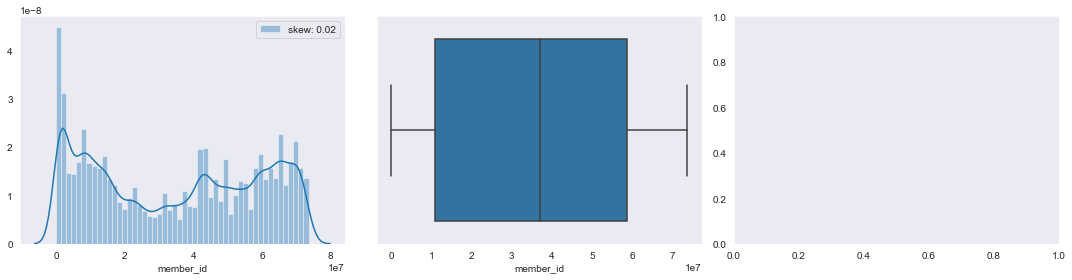

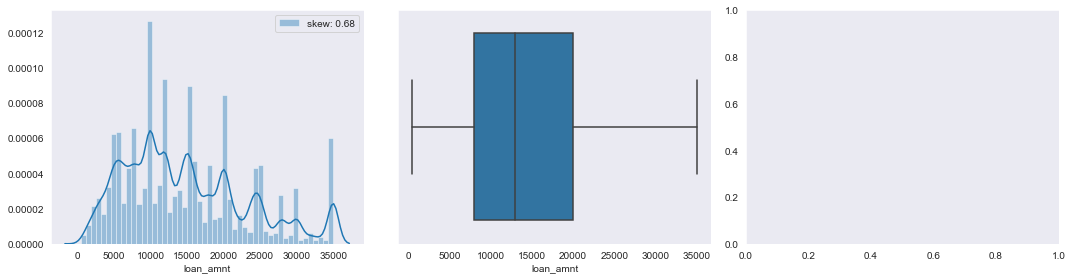

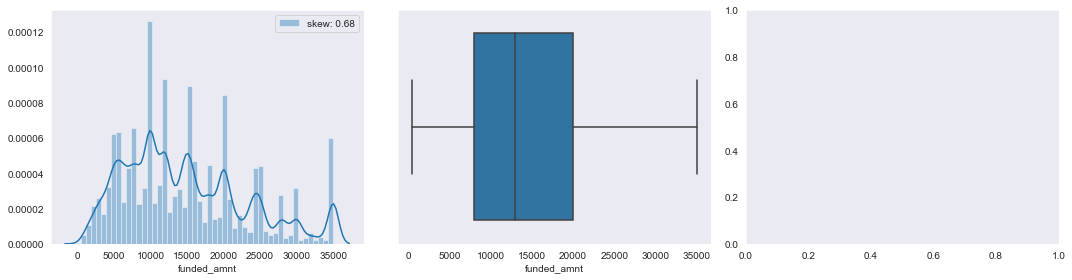

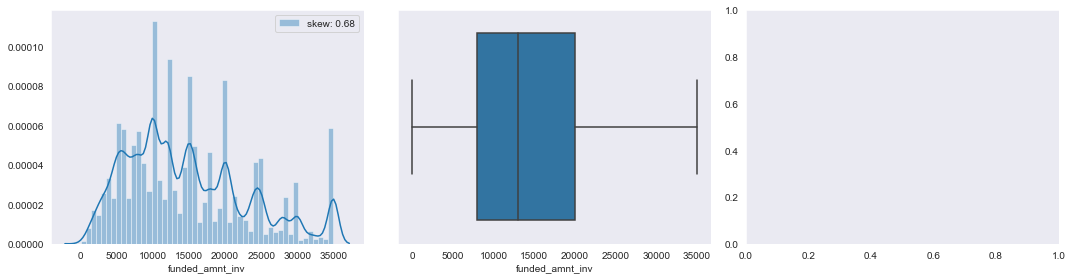

TypeError: could not convert string to float: '36 months'

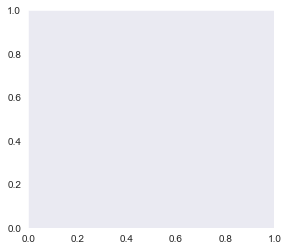

In [80]:
# Ploting graph for each varables to understand outliers
from scipy import stats

df=df6
sns.set_style('dark')
for col in df6.describe().columns:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    #stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [82]:
# Finding skew before and after to compare the shape after treatment 
# We can use SD, IQR, SKEW etc

for i in df6.describe().columns:
    print('The skewness for {} is {} and the Max_Z-Score value for {} is {} respectively'.format(i,df6[i].skew(),i,np.max(abs(stats.zscore(df6[i])))))

TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method